In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')

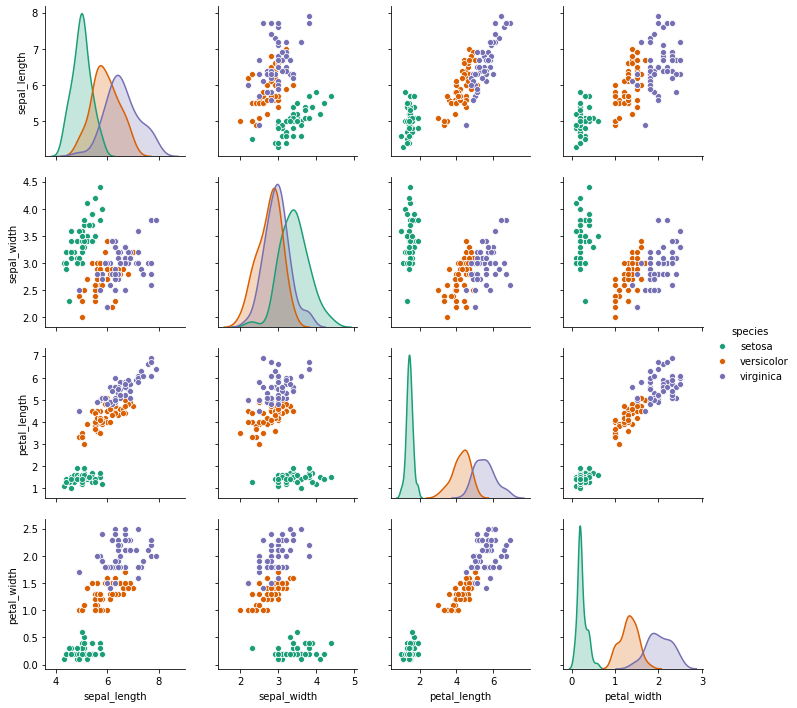

In [5]:
sns.pairplot(iris, hue='species', palette='Dark2')

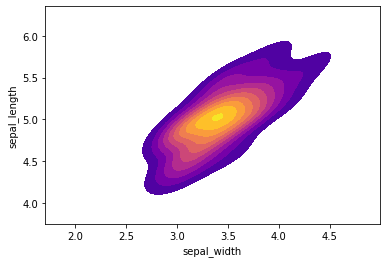

In [7]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap='plasma', shade=True,
           shade_lowest=False) #setosa = iris(iris['species']=='setosa')

In [26]:
setosa

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = iris.drop('species', axis=1)
y = iris['species']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.svm import SVC

In [12]:
svc_model = SVC()

In [13]:
svc_model.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
pred_svc = svc_model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
print(confusion_matrix(y_test, pred_svc))

[[14  0  0]
 [ 0 15  1]
 [ 0  0 15]]


In [17]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        16
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [20]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [23]:
grid_pred = grid.predict(X_test)

In [24]:
print(confusion_matrix(y_test, grid_pred))

[[14  0  0]
 [ 0 15  1]
 [ 0  1 14]]


In [25]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        16
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

